C:\Users\aranjan\AppData\Local\Temp\ipykernel_29456\3191906359.py:33: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(club_name, font=font)
C:\Users\aranjan\AppData\Local\Temp\ipykernel_29456\3191906359.py:33: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(club_name, font=font)
C:\Users\aranjan\AppData\Local\Temp\ipykernel_29456\3191906359.py:33: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(club_name, font=font)
C:\Users\aranjan\AppData\Local\Temp\ipykernel_29456\3191906359.py:41: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(club_name, font=font)
C:\Users\aranjan\AppData\Local\Temp\

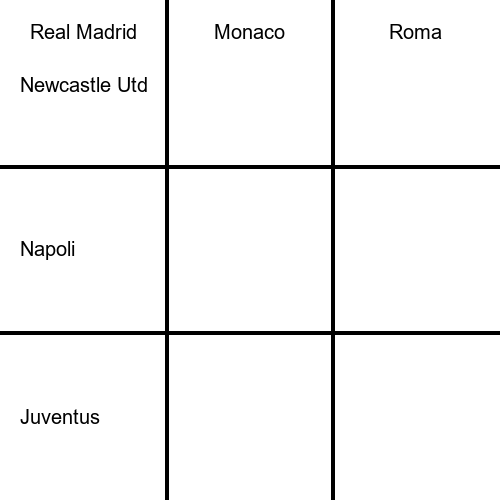

In [45]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import random
import requests
from io import BytesIO

# Load the dataset into a pandas dataframe
df = pd.read_csv(r'Kaggle-FootballClubsPerformance2022-23.csv')
df.head()
substrings = ['ENG', 'ESP', 'GER', 'ITA', 'FRA', 'POR', 'NED', 'BEL', 'SCO', 'TUR', 'AUT', 'GRE', 'SUI', 'RUS', 'UKR', 'DEN', 'CZE', 'SWE', 'POL']
df_europe = df[df['Country'].str.contains('|'.join(substrings))]
top_20 = df_europe.head(20)
top_20
# Randomly select six unique clubs from the top 50 dataframe
# Randomly select six unique clubs from the top 50 dataframe
clubs = list(top_20.sample(6)['Squad']) #random.sample(list(top_20['Squad']), 6)
clubs

# Choose 6 random clubs
clubs = random.sample(list(top_20['Squad']), 6)

# Create a new 500x500 image
image = Image.new('RGB', (500, 500), color='white')

# Define font properties for the club names
font = ImageFont.truetype('arial.ttf', 20)
font_color = (0, 0, 0)

# Create a drawing object
draw = ImageDraw.Draw(image)

# Draw the club names above the first 3 horizontal boxes
for i in range(3):
    club_name = clubs[i]
    w, h = draw.textsize(club_name, font=font)
    x = i * 166 + 83 - w / 2
    y = 20
    draw.text((x, y), club_name, fill=font_color, font=font)

# Draw the club names to the left of the first 3 vertical boxes
for i in range(3):
    club_name = clubs[i + 3]
    w, h = draw.textsize(club_name, font=font)
    x = 20
    y = i * 166 + 83 - h / 2
    draw.text((x, y), club_name, fill=font_color, font=font)

# Draw the tic-tac-toe grid
line_color = (0, 0, 0)
line_width = 4

draw.line((166, 0, 166, 500), fill=line_color, width=line_width)
draw.line((332, 0, 332, 500), fill=line_color, width=line_width)
draw.line((0, 166, 500, 166), fill=line_color, width=line_width)
draw.line((0, 332, 500, 332), fill=line_color, width=line_width)

# Save the image
image.save(r'tic_tac_toe.png')

# Display the image
image#.show()

In [46]:
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Barcelona,es ESP,1,28,23,3,2,53,9,...,72,2.57,54.3,22.2,32.1,1.15,W W W W D,83148,Robert Lewandowski - 17,Marc-André ter Stegen
1,2,Napoli,it ITA,1,29,24,2,3,66,21,...,74,2.55,52.8,24.9,28.0,0.96,L W W L W,27495,Victor Osimhen - 21,Alex Meret
2,3,Arsenal,eng ENG,1,30,23,4,3,72,29,...,73,2.43,58.9,31.6,27.3,0.91,W W W W D,60205,Martinelli - 14,Aaron Ramsdale
3,4,Manchester City,eng ENG,2,29,21,4,4,75,27,...,67,2.31,61.9,22.2,39.7,1.37,W W W W W,53194,Erling Haaland - 30,Ederson
4,5,Paris S-G,fr FRA,1,30,22,3,5,70,29,...,69,2.30,62.0,35.5,26.5,0.88,W W L L W,40067,Kylian Mbappé - 19,Gianluigi Donnarumma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Ajaccio,fr FRA,19,30,6,3,21,21,55,...,21,0.70,33.7,41.0,-7.2,-0.24,L L L L L,6422,Youcef Belaïli Mounaim El Idrissy - 6,Benjamin Leroy
94,95,Cremonese,it ITA,19,29,2,10,17,26,54,...,16,0.55,30.4,52.5,-22.1,-0.76,L L D L W,8197,Daniel Ciofani - 6,Marco Carnesecchi
95,96,Sampdoria,it ITA,20,29,3,6,20,18,50,...,15,0.52,25.8,46.1,-20.4,-0.70,D L W L L,12914,Manolo Gabbiadini - 6,Emil Audero
96,97,Angers,fr FRA,20,30,3,5,22,23,64,...,14,0.47,33.8,48.2,-14.4,-0.48,L L L D W,8456,Sofiane Boufal - 4,Paul Bernardoni
